In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
from pandas import read_csv, DataFrame
from Bio.SeqIO import parse
from subprocess import call
import pandas as pd
import seaborn as sns

In [4]:
opn_dada = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/seqtab.tsv', sep='\t')
tax_table = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/tax_calling_after_lulu/tax_table.tsv', sep='\t', index_col=0)
#tax_table
rename_asv = {}

count = 0

with open('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/tax_calling_after_lulu/all_consensus_new.fasta', 'w') as opn_fasta:
    for i in opn_dada[tax_table.index].columns:
        
        opn_fasta.write(f'>ASV{count}\n{i}\n')
        rename_asv[i] = f'ASV{count}'
        count += 1

opn_dada = opn_dada[tax_table.index] 

opn_dada = opn_dada.rename(columns =  rename_asv)
tax_table = tax_table.rename(index =  rename_asv)


opn_dada[tax_table.index].to_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/seqtab_reformat.tsv', sep='\t')
tax_table.to_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/taxtable_reformat.tsv', sep='\t')

In [5]:
nocontam_otu_table = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table.tsv', sep='\t')

with open('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/tax_calling_before_lulu/all_consensus_new.msa', 'w') as new_fasta:
        
    opn_fasta = parse('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/tax_calling_after_lulu/all_consensus.msa', 'fasta')
    for line in opn_fasta:
        if line.id not in nocontam_otu_table.columns:
            continue
        new_fasta.write(line.format('fasta'))

In [6]:
#opn_dada_norm = (opn_dada.T/opn_dada.sum(axis=1)).T
opn_dada_norm = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table.tsv', sep='\t')
opn_dada_norm = (opn_dada_norm.T/opn_dada_norm.sum(axis=1)).T
vls = opn_dada_norm[opn_dada_norm.index.str.contains('-F2')].mean()
for asv in vls.index:
    
    print(f'{asv}\t{vls[asv]}')

ASV1	0.05491967080873262
ASV6	0.06722243735703622
ASV356	4.997488761897147e-06
ASV91	0.0
ASV92	0.0
ASV305	8.207430111867273e-06
ASV119	0.0019713918943700713
ASV98	0.0
ASV68	0.0
ASV40	0.00878465570722089
ASV282	0.0
ASV30	0.001073653681126155
ASV82	0.0
ASV249	0.0
ASV332	0.0
ASV151	0.0
ASV333	0.0
ASV236	0.0
ASV242	0.0
ASV72	0.0
ASV53	0.02430954830640118
ASV255	0.0
ASV281	0.0
ASV50	0.015332761367814682
ASV45	0.0009230565505207935
ASV291	0.0
ASV213	0.0
ASV156	0.0
ASV127	0.0
ASV23	0.01655538394806524
ASV300	0.0
ASV316	0.0
ASV39	0.0017488480341343034
ASV344	0.0
ASV191	0.0
ASV327	0.0
ASV63	0.024390243902439025
ASV96	0.0
ASV27	0.0
ASV24	0.000177175150664016
ASV60	0.0004673732558885114
ASV309	0.0
ASV295	0.0
ASV313	0.0
ASV8	3.676921191322466e-05
ASV13	0.03731490100149365
ASV42	0.0010656564209056256
ASV338	8.069559603784623e-05
ASV15	0.0
ASV12	0.0
ASV9	0.0
ASV159	0.0
ASV95	0.0
ASV188	0.0
ASV147	0.0
ASV144	0.0
ASV233	0.0
ASV99	0.0
ASV169	0.0
ASV175	0.0
ASV265	0.0
ASV25	0.0
ASV259	0.0001875972183501

In [8]:
res_tableOE_tb_mapped = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/res_tableOE_tb_mapped_new.tsv', sep='\t')


In [10]:
tax_table = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//tax_table_decode_spec_level.tsv', sep='\t', index_col=0)
opn_nocontam = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')
opn_nocontam = opn_nocontam.rename(columns={i : tax_table['Species'][i] for i in opn_nocontam.columns})
opn_nocontam = opn_nocontam.loc[opn_nocontam.index[opn_nocontam.index.str.contains('MCOV')]]

In [11]:
fst_tp_idx = list(opn_nocontam[opn_nocontam.index.str.contains('F1')].index) 
second_tp_idx = list(opn_nocontam[opn_nocontam.index.str.contains('F2')].index)
opn_nocontam = opn_nocontam.loc[np.concatenate([fst_tp_idx, second_tp_idx])]

100%|████████████████████████████████████████████████████████████████████████████████| 102/102 [00:08<00:00, 12.55it/s]


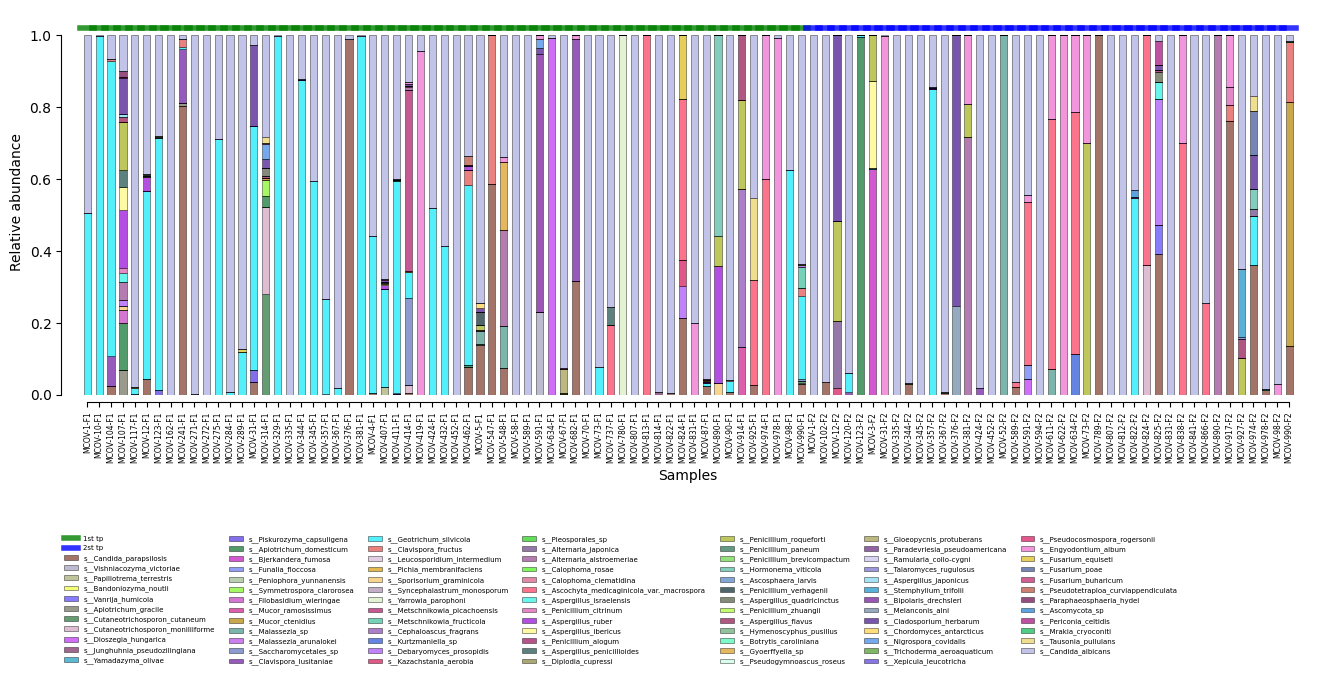

In [14]:
import matplotlib
import random 
def get_color(tax_list):
        
    color = ''
    
    while color not in tax_list.values() and color == '':
        
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    return color

plt.figure(figsize=(16, 5))
data_tax_df = opn_nocontam.T
data_tax_df = data_tax_df/data_tax_df.sum(axis=0)
#data_tax_df = data_tax_df[np.sort(data_tax_df.columns)]
all_coords = []
width = 0.6
sample_coord = 0 
c = []
fst = True
legend_stack = []

Color_collection = {}
colorsamples = {'F1' : 'green', 'F2': 'blue', 'H':'red'}
f1 = True
f2 = True
H = True

for i in data_tax_df.index:
    
    Color_collection[i] = get_color(Color_collection)
#data_tax_df = data_tax_df[data_tax_df.columns[data_tax_df.columns.str.contains('MCOV')]]
for sample in tqdm(data_tax_df.columns):
    
    bottom = 0
    all_coords.append(sample_coord)
    
    for otu in data_tax_df.index:
        if otu not in legend_stack:
            plt.bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          label=otu, 
                          bottom=bottom,
                          edgecolor='black',
                          linewidth=0.4, 
                          alpha=.7,
                          color=Color_collection[otu])
            legend_stack.append(otu)
        else:
            plt.bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          bottom=bottom,
                          edgecolor='black',
                          alpha=.7,
                          linewidth=0.4, 
                          color=Color_collection[otu])
        bottom += data_tax_df[sample][otu]
    if 'F1' in sample:
        if f1 == True:
            
            plt.plot([sample_coord-width, sample_coord+width], [1.02, 1.02], linewidth=4, color=colorsamples['F1'], alpha=.8, label='1st tp')
            f1 = False

        else:
            
            plt.plot([sample_coord-width, sample_coord+width], [1.02, 1.02], linewidth=4, color=colorsamples['F1'], alpha=.8)

    if 'F2' in sample:
        if f2 == True:

            plt.plot([sample_coord-width, sample_coord+width], [1.02, 1.02], linewidth=4, color=colorsamples['F2'], alpha=.8, label='2st tp')
            f2 = False
        else:
            
            plt.plot([sample_coord-width, sample_coord+width], [1.02, 1.02], linewidth=4, color=colorsamples['F2'], alpha=.8)
    
    sample_coord += 1
plt.xlim(-1-width, sample_coord+width)
plt.xticks(all_coords, data_tax_df.columns, rotation=90, fontsize=5.5)
sns.despine(offset=5, trim=True)
plt.xticks(all_coords, data_tax_df.columns, rotation=90, fontsize=5.5)
plt.legend(ncols=7, bbox_to_anchor=(0.9, -0.35), fontsize=5, frameon=False)
plt.xlabel('Samples')
plt.ylabel('Relative abundance')
#plt.savefig('VIZ_NEW//Abundance_bar.png', bbox_inches='tight', dpi=800)
#plt.savefig('VIZ_NEW//Abundance_bar.pdf')
plt.show()

In [435]:
tax_table = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//tax_table_decode.tsv', sep='\t', index_col=0)
opn_nocontam = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_sp.tsv', sep='\t')
opn_nocontam = opn_nocontam.rename(columns={i : tax_table['Species'][i] for i in opn_nocontam.columns})


In [1480]:
def osd(counts):
    """Returns observed, singles and doubles from counts.

    Handy for diversity calculations."""
    return (counts!=0).sum(), (counts==1).sum(), (counts==2).sum()
def chao1_bias_corrected(observed, singles, doubles):
    """Calculates bias-corrected chao1 given counts: Eq. 2 in EstimateS manual.

    Formula: chao1 = S_obs + N_1(N_1-1)/(2*(N_2+1)) where N_1 and N_2 are
    count of singletons and doubletons respectively.

    Note: this is the bias-corrected formulat from Chao 1987, Eq. 2 in the
    EstimateS manual.
    """
    return observed + singles*(singles-1) / (2.0*(doubles+1))
    
def chao1(counts, bias_corrected=True):
    """Calculates chao1 according to table in EstimateS manual.

    Specifically, uses bias-corrected version unless bias_corrected is set
    to False _and_ there are both singletons and doubletons."""
    o, s, d = osd(counts)
    if not bias_corrected:
        if s:
            if d:
                return chao1_uncorrected(o, s, d)
    return chao1_bias_corrected(o, s, d)
def chao1_richness(data):
    
    return [chao1(data[i], bias_corrected=True) for i in data.columns]
    
def simpson_di(data):
    return 1 - np.sum((data/data.sum(axis=0))**2, axis=0).values

In [1481]:
from scipy import stats
def geom_signif(data, max, ax):
    
    # Initialise a list of combinations of groups that are significantly different
    significant_combinations = []
    # Check from the outside pairs of boxes inwards
    ls = list(range(1, len(data) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    print(combinations)
    for combination in combinations:
        data1 = data[combination[0] - 1]
        data2 = data[combination[1] - 1]
        # Significance
        U, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        #if p < 0.05:
        significant_combinations.append([combination, p])
    
    #print(significant_combinations)
    bottom, top = [0, max]
    y_range = top - bottom
    # Significance bars
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = significant_combination[0][0]-1
        x2 = significant_combination[0][1]-1
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (y_range * 0.1 * level) + top
        bar_tips = bar_height - (y_range * 0.02)
        ax.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
        )
        # Significance level
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        elif p > 0.05:
            sig_symbol = 'NS.'
        text_height = bar_height + (y_range * 0.01)
        
        ax.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')

[(1, 2)]
[(1, 2)]
[(1, 2)]


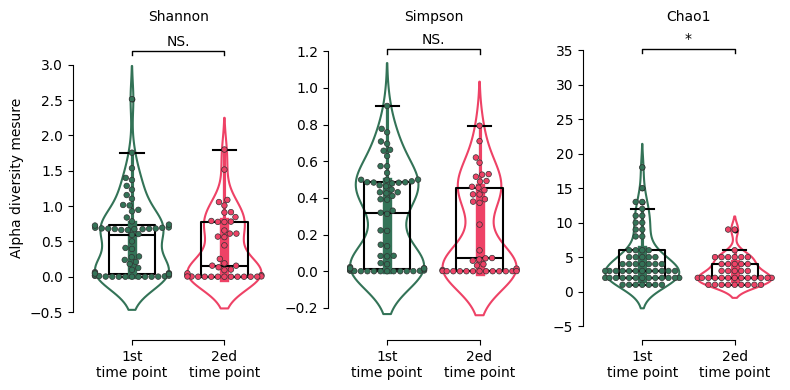

In [1483]:
from scipy.stats import entropy
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

flierprops = dict(markerfacecolor='0.75', 
                  markersize=3,
                  linestyle='none')
h = opn_nocontam.index[opn_nocontam.index.str.contains('F')!=1]
f1 = opn_nocontam.index[opn_nocontam.index.str.contains('F1')]
f2 = opn_nocontam.index[opn_nocontam.index.str.contains('F2')]
healthy_F1_subset = opn_nocontam.loc[f1].T
healthy_F2_subset = opn_nocontam.loc[f2].T

sns.boxplot([
             entropy(healthy_F1_subset),
             entropy(healthy_F2_subset)], 
             linewidth=1.5, 
             width=.5,
             fill=False,
            color='black',             #showcaps=False,
             flierprops=flierprops,
             ax=axs[0])
sns.violinplot([entropy(healthy_F1_subset),
             entropy(healthy_F2_subset)], palette=('#337357', '#EE4266', '#FFD23F'), fill=False, ax=axs[0])
sns.swarmplot([
             entropy(healthy_F1_subset), 
             entropy(healthy_F2_subset)],
             palette=('#337357', '#EE4266', '#FFD23F'),
             s=4,
             ax=axs[0], linewidth=0.5)
data = [
        entropy(healthy_F1_subset),
        entropy(healthy_F2_subset)]
geom_signif(data, max=2.9, ax=axs[0])
axs[0].set_ylabel('Alpha diversity mesure', fontsize=10)

axs[0].set_xticks([0, 1], [ '1st\ntime point', '2ed\ntime point'], fontsize=10)
sns.despine(trim=True, offset=10, ax=axs[0])
axs[0].set_ylim(-0.7, 3.5)
#axs[0].set_xlim(-0.5, 2.5)
#axs[0].grid(alpha=.4)
axs[0].set_title('Shannon', fontsize=10)

sns.boxplot([
             simpson_di(healthy_F1_subset),
             simpson_di(healthy_F2_subset)], 
             linewidth=1.5, 
             width=.5,
             fill=False,
            color='black',             #showcaps=False,
             flierprops=flierprops,
             ax=axs[1])
sns.violinplot([simpson_di(healthy_F1_subset),
             simpson_di(healthy_F2_subset)], palette=('#337357', '#EE4266', '#FFD23F'), fill=False, ax=axs[1])
sns.swarmplot([
             simpson_di(healthy_F1_subset), 
             simpson_di(healthy_F2_subset)],
             palette=('#337357', '#EE4266', '#FFD23F'),
             s=4,
             ax=axs[1], linewidth=0.5)
data = [
        simpson_di(healthy_F1_subset),
        simpson_di(healthy_F2_subset)]
geom_signif(data, max=1.1,ax=axs[1])
#axs[1].set_ylabel('Simpson', fontsize=12)
axs[1].set_xticks([0, 1], ['1st\ntime point', '2ed\ntime point'], fontsize=10)
sns.despine(trim=True, offset=10,ax=axs[1])
axs[1].set_ylim(-0.3, 1.32)
#axs[1].set_xlim(-0.5, 2.5)
#axs[1].grid(alpha=.4)
axs[1].set_title('Simpson', fontsize=10)

sns.boxplot([
             chao1_richness(healthy_F1_subset),
             chao1_richness(healthy_F2_subset)], 
             linewidth=1.5, 
             width=.5,
             fill=False,
            color='black',
            # showcaps=False,
             flierprops=flierprops,
             ax=axs[2])
sns.violinplot([chao1_richness(healthy_F1_subset),
             chao1_richness(healthy_F2_subset)], palette=('#337357', '#EE4266', '#FFD23F'), fill=False, ax=axs[2])
sns.swarmplot([
             chao1_richness(healthy_F1_subset), 
             chao1_richness(healthy_F2_subset)],
             palette=('#337357', '#EE4266', '#FFD23F'),
             s=4,
             ax=axs[2], linewidth=0.5)
data = [
        chao1_richness(healthy_F1_subset),
        chao1_richness(healthy_F2_subset)]
geom_signif(data, max=32, ax=axs[2])
#axs[2].set_ylabel('Chao1', fontsize=12)
axs[2].set_xticks([0, 1], ['1st\ntime point', '2ed\ntime point'], fontsize=10)
axs[2].set_ylim(-5, 38)
#axs[2].set_xlim(-0.5, 2.5)
sns.despine(trim=True, offset=10, ax=axs[2])
#axs[2].grid(alpha=.4)
axs[2].set_title('Chao1', fontsize=10)
plt.tight_layout()
plt.savefig('VIZ_NEW/alpha_diversity_after_decontamination_pair.pdf')
plt.savefig('VIZ_NEW/alpha_diversity_after_decontamination_pair.png', dpi=800)

In [1426]:
tax_table = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//tax_table_decode.tsv', sep='\t', index_col=0)
opn_nocontam = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table.tsv', sep='\t')
opn_nocontam = opn_nocontam.rename(columns={i : tax_table['Species'][i] for i in opn_nocontam.columns})


In [1427]:
opn_nocontam = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_sp.tsv', sep='\t')


In [493]:
#opn_nocontam[opn_nocontam.sum(axis=0).sort_values()]

In [1185]:
metadata = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/metadata_2024_11_15.tsv', sep='\t', index_col=0)
tps = []

for samp in metadata.index:
    if 'F1' in samp:
        tps.append('F1')
    else:
        tps.append('F2')
metadata['Time_point'] = tps 
mid = metadata[((metadata.who1 <= 3) & (metadata.CT == 'CT1')) | ((metadata.who1 <= 2) & (metadata.CT == 'CT2')) | ((metadata.who1 <= 2) & (metadata.CT == 'CT3'))].index

severe = metadata[((metadata.who1 == 4) & (metadata.CT == 'CT1')) | ((metadata.who1 >= 3) & (metadata.CT == 'CT2')) | ((metadata.who1 >= 3) & (metadata.CT == 'CT3'))].index

severe_status = []

for i in metadata.index:
    if i in mid:
        severe_status.append('middle')
        continue
    if i in severe:
        severe_status.append('severe')
        continue
    severe_status.append('Unknown')

metadata['severe_status'] = severe_status
metadata.to_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//mcov_meta_new.tsv', sep='\t')

In [1186]:
metadata

,sex,age,antibiotics.before.hospitalization,Coronary.heart.disease,Chronic.obstructive.pulmonary.disease,who1,who2,Obesity,Arterial hypertension,Chronic.heart.failure,...,Inflammatory.diseases.of.the.bowel,Cirrhosis.of the liver,Taking.glucocorticoids.biological.therapy,CT,antibiotics,Proton_pump_inhibitors,antimycotics,yeasts,Time_point,severe_status
ID,,,,,,,,,,,,,,,,,,,,,
MCOV_1,female,54,yes,no,no,3.0,1.0,yes,no,no,...,no,no,no,CT1,no,no,no,no,F2,middle
MCOV_10,male,61,yes,no,yes,3.0,1.0,yes,yes,no,...,no,no,no,CT3,yes,no,no,no,F2,severe
MCOV_102,female,68,no,no,no,3.0,1.0,no,no,no,...,no,no,no,CT1,yes,yes,no,no,F2,middle
MCOV_104,male,59,yes,no,no,4.0,1.0,no,no,no,...,yes,no,no,CT1,yes,yes,no,no,F2,severe
MCOV_107,female,66,no,no,no,3.0,1.0,no,yes,no,...,no,no,no,CT2,no,yes,no,no,F2,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCOV_927,female,34,no,no,no,3.0,1.0,no,no,no,...,yes,no,yes,CT1,no,yes,no,no,F2,middle
MCOV_974,female,60,yes,no,no,3.0,1.0,no,yes,no,...,no,no,no,CT1,no,yes,no,no,F2,middle
MCOV_978,male,71,no,yes,no,3.0,1.0,no,yes,no,...,no,no,no,CT1,no,yes,no,no,F2,middle


In [1168]:
[print(i) for i in metadata.columns]

id
subject_id
df_sample
sex
age
dataset
antibiotics
hypertension
Ишемическая.болезнь.сердца
heart_falure
severity
obesity
diabetes
smoking_now
smoking_before
Хроническая.обструктивная.болезнь.лёгких
inflammatory_bowel
specimen_type
time_point
ИВЛ
Летальный_исход
news_delta
who_delta
ШКАЛА_NEWS
WHO
День.заболевания.на.момент.госпитализации
Дата.выписки
add_O2
дней_в_стац
месяц_поступления
месяц_выписки
время_в_стац_недели
total_sick
Дата.поступления
sampling.date
age_group
Shannon
df_sample.1
who1
who2
group_who_1
group_who_2
group1_who_1
group1_who_2
group2_who_1
group2_who_2
group1_who1
group1_who2
group2_who1
group2_who2
group3_who1
df.Степень.тяжести.пневмонии.по.КТ
CT
group_case
Concentration
Time_point
severe_status


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [1241]:
import matplotlib
def get_color(tax_list):
        
    color = ''
    
    while color not in tax_list.values() and color == '':
        
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    return color
Color_collection = {}

sankey_data = {'source' : [],
               'target' : [],
               'value' : [],
               'color' : []
              }
labels = []
colors = []
Color_collection = {}
label_color = []

Color_collection_label = {}
edge_decoder = {}

edge_count = 0
from PIL import ImageColor

for who in np.sort(metadata["who1"].unique()):
   # if str(who) == 'nan':        
 #   who = 'No data who1'
    edge_count_who = edge_count
    labels.append(who)
    edge_decoder[who] = edge_count
    
    if who not in Color_collection_label:
   #     if who == 'No data who1':
    #        Color_collection_label[who] = '#000000'
    #    else:    
        Color_collection_label[who] = get_color(Color_collection)
    
    label_color.append(f"rgba{matplotlib.colors.to_rgba(Color_collection_label[who])}"[:-4] + "0.5)")
    
    for kt in metadata["CT"].unique():
     #   print(who, kt)
        edge_count += 1
        if kt not in edge_decoder:
    
            edge_decoder[kt] = edge_count
            
        if kt not in Color_collection_label:
          #  if kt == 'нет_данных' or who == 'No data who1':
          #      Color_collection_label[kt] = '#000000'
          #  else:
            Color_collection_label[kt] = get_color(Color_collection_label)
        sankey_data['source'].append(who)
        sankey_data['target'].append(kt)
    #    if who == 'No data who1':
     #       sankey_data['value'].append(len(metadata[(pd.isna(metadata["who1"])) & (metadata["CT"] == kt)]))    
      #  else:
        sankey_data['value'].append(len(metadata[(metadata["who1"] == who) & (metadata["CT"] == kt)]))

        #if who == 'No data who1':
            #if stat == 'Unknown':
            #    Color_collection_label[stat] = '#000000'
            #else:
         #   Color_collection_label[stat] = get_color(Color_collection_label)
    
        Color_collection[f'{who}_{kt}'] = get_color(Color_collection)
        label_color.append(f"rgba{matplotlib.colors.to_rgba(Color_collection_label[kt])}"[:-4] + "0.5)")
        
       # if kt == 'нет_данных':
       #     labels.append('No data CT')
       # else:
        labels.append(kt)
        
        for stat in metadata["severe_status"].unique():
            
            edge_count += 1
            
            if stat not in edge_decoder:
        
                edge_decoder[stat] = edge_count
                
            if stat not in Color_collection_label:
              #  if stat == 'Unknown':
               #     Color_collection_label[stat] = '#000000'
                #else:
                Color_collection_label[stat] = get_color(Color_collection_label)
           # print(kt)
            sankey_data['source'].append(kt)
            sankey_data['target'].append(stat)

      #      if who == 'No data who1':
      #          sankey_data['value'].append(len(metadata[(pd.isna(metadata["who1"])) & (metadata["CT"] == kt)& (metadata["severe_status"] == stat)]))
       #     else:
            sankey_data['value'].append(len(metadata[(metadata["who1"] == who) & (metadata["CT"] == kt)& (metadata["severe_status"] == stat)]))
            Color_collection[f'{who}_{kt}_{stat}'] = get_color(Color_collection)
            label_color.append(f"rgba{matplotlib.colors.to_rgba(Color_collection_label[stat])}"[:-4] + "0.5)")
            
            labels.append(stat)
            
        
        

    edge_count += 1

rgba_decode = []
for h in Color_collection.items():
#    if 'нет_данных' in h[0] or 'Unknown' in h[0] or 'No data who1' in h[0]:
#        rgba_decode.append(f"rgba{matplotlib.colors.to_rgba('#000000')}"[:-4] + "0.5)")
#        continue
    rgba_decode.append(f"rgba{matplotlib.colors.to_rgba(h[1])}"[:-4] + "0.5)")
    
sankey_data['color'] = rgba_decode

In [1245]:
metadata["who1"].unique()

array([3., 4., 2., 1., 0.])

In [1246]:
df = DataFrame(sankey_data)
df['source'] = pd.Categorical(df['source'], [0.0, 1.0, 2.0, 3.0, 4.0, 'CT1', 'CT2', 'CT3'])
df['target'] = pd.Categorical(df['target'], ['CT1', 'CT2', 'CT3', 'severe', 'middle'])
df.sort_values(['source', 'target'], inplace = True)
df.reset_index(drop=True)
#value = df[df.source == 'нет_данных'].value.sum(axis=0)
#df = df.drop(df[df.source == 'нет_данных'].index)
#df2 = DataFrame({'source' : ['нет_данных'], 'target' : ['Unknown'], 'value' : value, 'color' : ['rgba(0.0, 0.0, 0.0, 0.5)']})
#df = pd.concat([df, df2]).reset_index(drop=True)
#df.source.unique()

,source,target,value,color
0,0.0,CT1,1,"rgba(0.6666666666666666, 0.7411764705882353, 0..."
1,0.0,CT2,0,"rgba(0.2823529411764706, 0.8823529411764706, 0..."
2,0.0,CT3,0,"rgba(0.5411764705882353, 0.6705882352941176, 0..."
3,1.0,CT1,2,"rgba(0.5058823529411764, 0.1568627450980392, 0..."
4,1.0,CT2,2,"rgba(0.1450980392156863, 0.8509803921568627, 0..."
5,1.0,CT3,0,"rgba(0.3176470588235294, 0.8313725490196079, 0..."
6,2.0,CT1,1,"rgba(0.6549019607843137, 0.07058823529411765, ..."
7,2.0,CT2,3,"rgba(0.30980392156862746, 0.6470588235294118, ..."
8,2.0,CT3,1,"rgba(0.403921568627451, 0.1568627450980392, 0...."
9,3.0,CT1,29,"rgba(0.07450980392156863, 0.38823529411764707,..."


In [1247]:
node_decoder = {}
c = 0
label_color = []

for node in [0.0, 1.0, 2.0, 3.0, 4.0, 'CT1', 'CT2', 'CT3']:
    #print(c)
    node_decoder[node] = c
    label_color.append((f"rgba{matplotlib.colors.to_rgba(Color_collection_label[node])}"[:-4] + "0.5)"))
    c += 1
    
for node in ['severe', 'middle']:
   
    if node in node_decoder:continue
    
    node_decoder[node] = c
    label_color.append((f"rgba{matplotlib.colors.to_rgba(Color_collection_label[node])}"[:-4] + "0.5)"))

    c += 1
    

In [1248]:
start = [node_decoder[i] for i in df['source'].values]
target = [node_decoder[i] for i in df['target'].values]
sankey = {'source' : start, 'target' : target, 'value' : list(df['value']), 'color' : list(df['color'])}

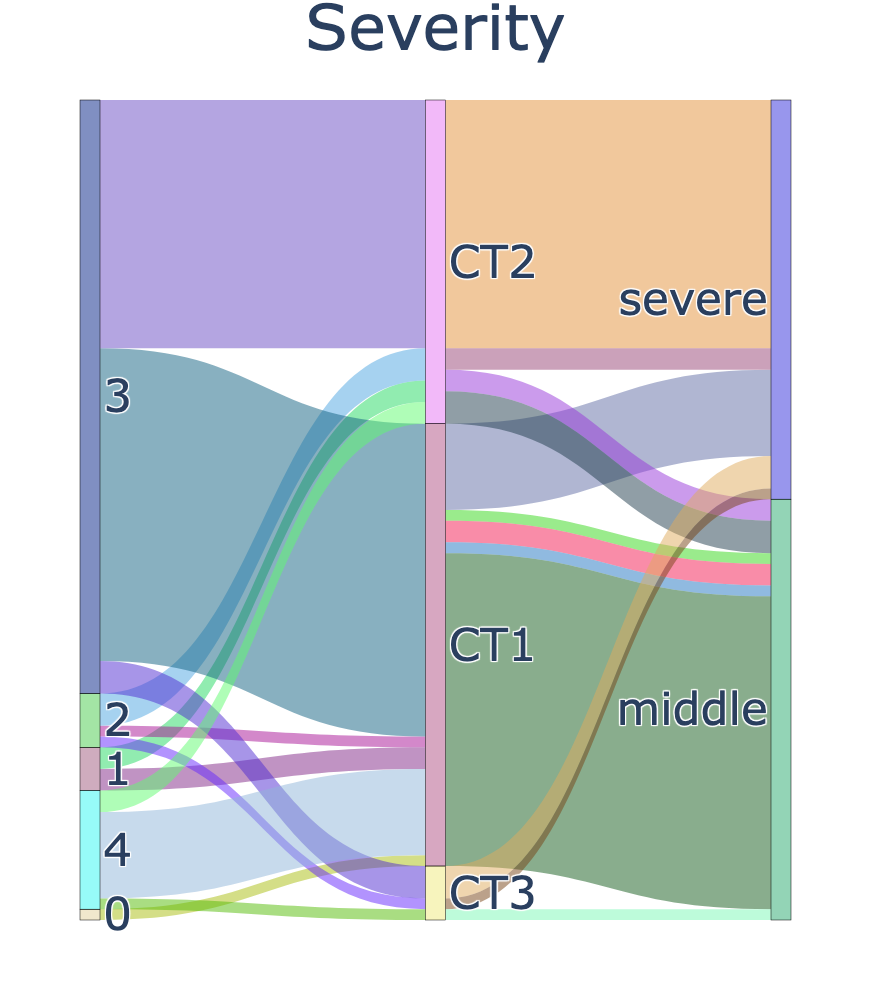

In [1491]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 0,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [0., 1.0, 2.0, 3.0, 4.0, 'CT1', 'CT2', 'CT3', 'severe', 'middle'], 
      color=label_color
      
    ),
    link = sankey
)])

fig.update_layout(title_text="Severity", font_size=45, title_x=0.5,width=1600, height=1000)
fig.write_image("VIZ_NEW/Sankey.png")
fig.show()

In [1301]:
new_meta = {}
tps = []

for i in opn_nocontam.index[opn_nocontam.index.str.contains('MCOV')]:
    
    new_meta[i] = metadata.loc['_'.join(i.split('-')[:2])].to_dict()
    tps.append(i.split('-')[2])
new_meta = DataFrame(new_meta).T
new_meta['time_point'] = tps

In [1315]:
old = new_meta.index[new_meta.age >= 60]
noold = new_meta.index[new_meta.age < 60]
new_meta['age_group'] = ['old' for i in range(len(new_meta))]
new_meta['age_group'][old] = 'old'
new_meta['age_group'][noold] = 'noold'

In [1317]:
new_meta.value_counts('age_group')

age_group
old      73
noold    29
Name: count, dtype: int64

In [1493]:
new_meta.to_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//mcov_meta_new.tsv', sep='\t')

In [ ]:
CT, who1, severe_status, sex, age_group, time_point, antibiotics, antibiotics.before.hospitalization, Proton_pump_inhibitors, Taking.glucocorticoids.biological.therapy, Obesity, Diabetes, Inflammatory.diseases.of.the.bowel, Arterial.hypertension, Current.smoking, Coronary.heart.disease

In [1338]:
new_meta.value_counts('CT')

CT
CT1    56
CT2    40
CT3     6
Name: count, dtype: int64

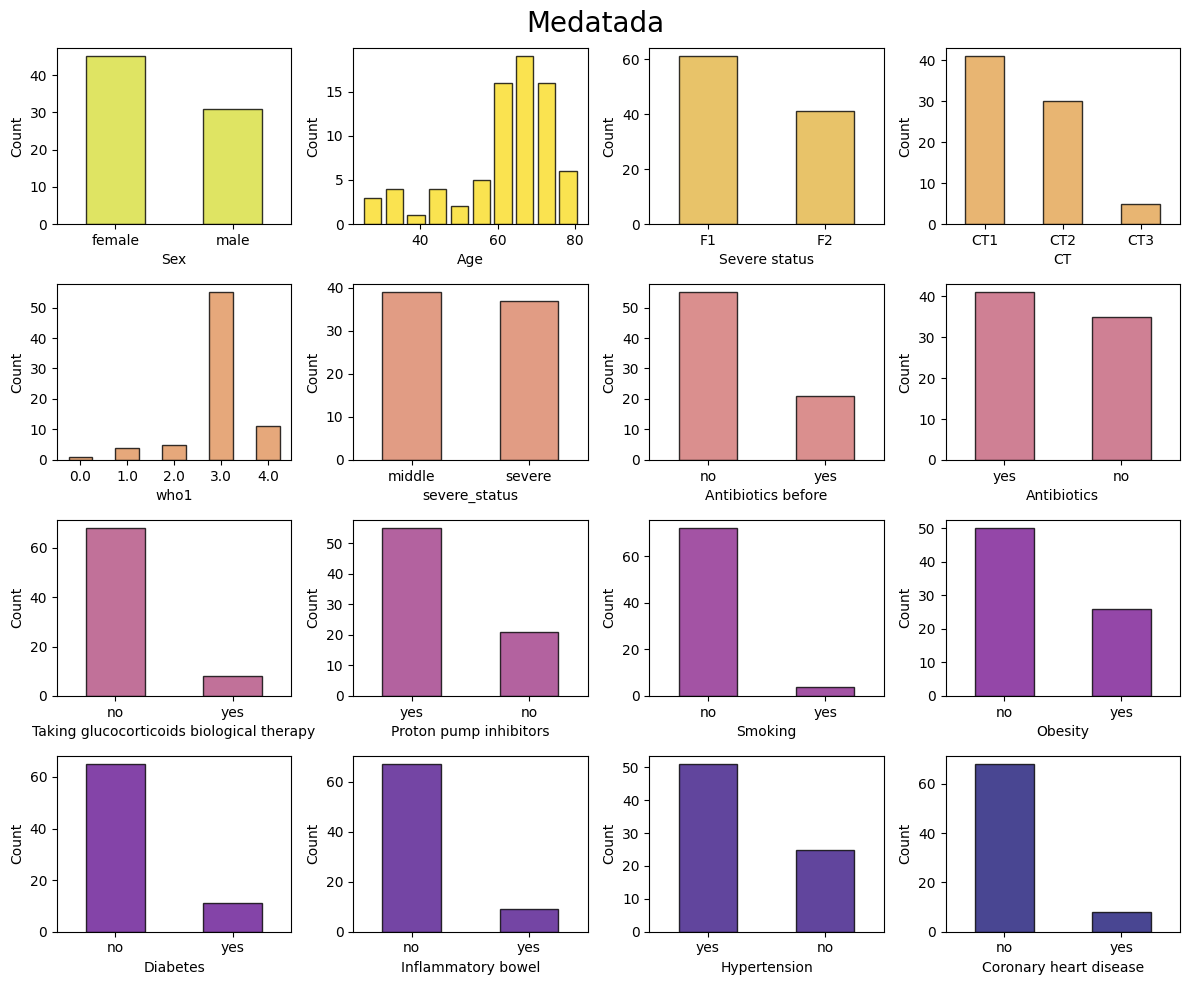

In [1771]:
## from mycolorpy import colorlist as mcp

fig, axs = plt.subplots(4, 4, figsize=(12, 10))
colors =mcp.gen_color(cmap="plasma",n=4*4)[::-1]
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('sex'), edgecolor='black', ax=axs[0][0], width=0.5, color=colors[0], alpha=.8)
axs[0][0].set_ylabel('Count')
axs[0][0].set_xlabel('Sex')
#--------------------------------------------------------------------------------------------------------------
axs[0][1].hist(metadata['age'].values, rwidth=0.8, bins=10, linewidth=1, edgecolor='black', color=colors[1], alpha=.8)
axs[0][1].set_ylabel('Count')
axs[0][1].set_xlabel('Age')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(new_meta.value_counts('time_point'), edgecolor='black', ax=axs[0][2], width=0.5, color=colors[2], alpha=.8)
axs[0][2].set_ylabel('Count')
axs[0][2].set_xlabel('Time point')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('CT'), edgecolor='black', ax=axs[0][3], width=0.5, color=colors[3], alpha=.8)
axs[0][3].set_ylabel('Count')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('who1'), edgecolor='black', ax=axs[1][0], width=0.5, color=colors[4], alpha=.8)
axs[1][0].set_ylabel('Count')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('severe_status'), edgecolor='black', ax=axs[1][1], width=0.5, color=colors[5], alpha=.8)
axs[0][2].set_xlabel('Severe status')
axs[1][1].set_ylabel('Count')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('antibiotics'), edgecolor='black', width=0.5, ax=axs[1][2], color=colors[6], alpha=.8)
axs[1][2].set_ylabel('Count')
axs[1][2].set_xlabel('Antibiotics before')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('antibiotics.before.hospitalization'), edgecolor='black', width=0.5, ax=axs[1][3], color=colors[7], alpha=.8)
axs[1][3].set_ylabel('Count')
axs[1][3].set_xlabel('Antibiotics')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Taking.glucocorticoids.biological.therapy').rename(index={'no_data':'no data'}), edgecolor='black', ax=axs[2][0], width=0.5, color=colors[8], alpha=.8)
axs[2][0].set_ylabel('Count')
axs[2][0].set_xlabel('Taking glucocorticoids biological therapy')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Proton_pump_inhibitors').rename(index={'no_data':'no data'}), edgecolor='black', ax=axs[2][1], width=0.5, color=colors[9], alpha=.8)
axs[2][1].set_ylabel('Count')
axs[2][1].set_xlabel('Proton pump inhibitors')
#--------------------------------------------------------------------------------------------------------------
#sns.barplot(metadata.value_counts('antimycotics'), edgecolor='black', width=0.5, ax=axs[2][2], color=colors[13], alpha=.8)
#axs[2][2].set_ylabel('Count')
#axs[2][2].set_xlabel('Antimycotics')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Current.smoking'), edgecolor='black', ax=axs[2][2], width=0.5, color=colors[10], alpha=.8)
axs[2][2].set_ylabel('Count')
axs[2][2].set_xlabel('Smoking')
#--------------------------------------------------------------------------------------------------------------
#sns.barplot(metadata.value_counts('Past.smoking'), edgecolor='black', ax=axs[3][0], width=0.5, color=colors[10], alpha=.8)
#axs[3][0].set_ylabel('Count')
#axs[3][0].set_xlabel('Smoking (before)')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Obesity').rename(index={'no_data':'no data'}), edgecolor='black', ax=axs[2][3], width=0.5, color=colors[11], alpha=.8)
axs[2][3].set_ylabel('Count')
axs[2][3].set_xlabel('Obesity')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Diabetes'), edgecolor='black', ax=axs[3][0], width=0.5, color=colors[12], alpha=.8)
axs[3][0].set_ylabel('Count')
axs[3][0].set_xlabel('Diabetes')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Inflammatory.diseases.of.the.bowel'), edgecolor='black', ax=axs[3][1], width=0.5, color=colors[13], alpha=.8)
axs[3][1].set_ylabel('Count')
axs[3][1].set_xlabel('Inflammatory bowel')
#--------------------------------------------------------------------------------------------------------------
sns.barplot(metadata.value_counts('Arterial hypertension'), edgecolor='black', ax=axs[3][2], width=0.5, color=colors[14], alpha=.8)
axs[3][2].set_ylabel('Count')
axs[3][2].set_xlabel('Hypertension')

sns.barplot(metadata.value_counts('Coronary.heart.disease'), edgecolor='black', ax=axs[3][3], width=0.5, color=colors[15], alpha=.8)
axs[3][3].set_ylabel('Count')
axs[3][3].set_xlabel('Coronary heart disease')




plt.suptitle('Medatada', fontsize=20)
plt.tight_layout()
plt.savefig('VIZ_NEW//Metadata.png', dpi=800, bbox_inches='tight')
plt.savefig('VIZ_NEW//Metadata.pdf', bbox_inches='tight')
plt.show()

In [1515]:
opn_nocontam_norm = (opn_nocontam.T / opn_nocontam.sum(axis=1)).T


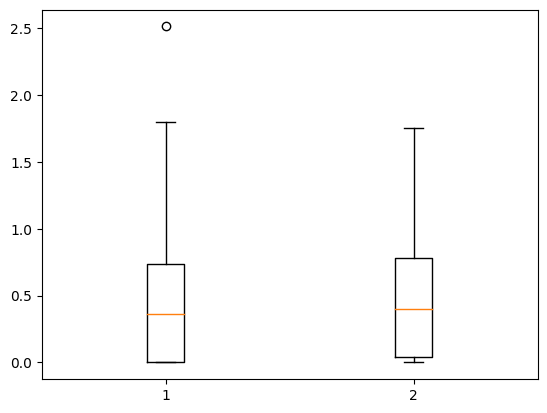

In [1517]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'female']], axis=1), entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'male']], axis=1)])
plt.show()

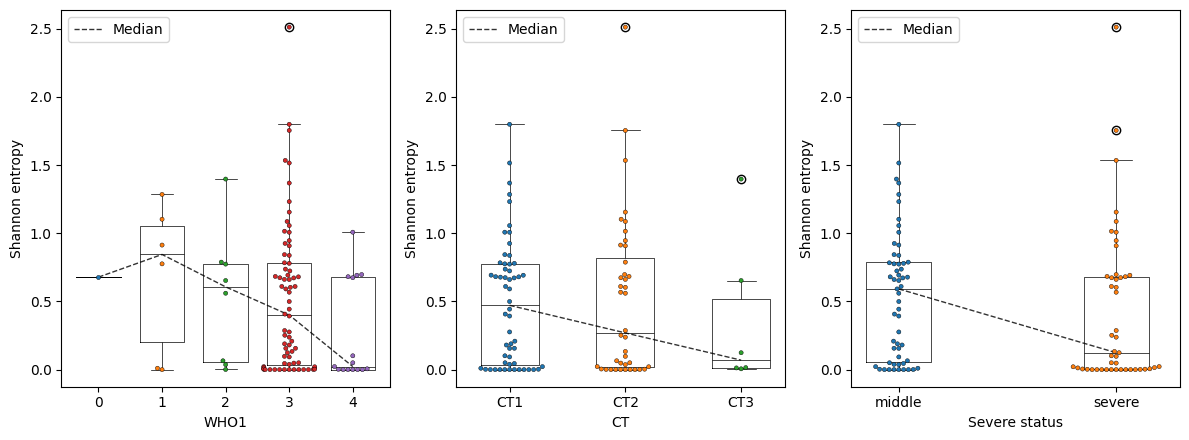

In [1985]:
tax_table_decode_spec_level = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08//tax_table_decode_spec_level.tsv', sep='\t', index_col=0)
nocontam_otu_table_spec_level = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')
#opn_nocontam = opn_nocontam.rename(columns={i : tax_table['Species'][i] for i in opn_nocontam.columns})
fig, axs = plt.subplots(1, 3, figsize=(12, 4.5))

#ax11 = plt.subplot(221)
#ax12 = plt.subplot(222)
#ax13 = plt.subplot(212)
#axs = [ax11, ax12, ax13]
sns.boxplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 4]], axis=1),], fill=False, width=0.7, color='black', linewidth=.5, ax=axs[0])

sns.swarmplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 4]], axis=1),], s=3, edgecolor='black', linewidth=.3, ax=axs[0])


axs[0].plot([np.median(i) for i in [entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.who1 == 4]], axis=1),]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')
axs[0].set_ylabel('Shannon entropy')
axs[0].set_xlabel('WHO1')
axs[0].legend()

sns.boxplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], fill=False, width=0.5, color='black', linewidth=.5, ax=axs[1])

sns.swarmplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], s=3, edgecolor='black', linewidth=.3, ax=axs[1])
axs[1].plot([np.median(i) for i in [entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')

axs[1].legend(loc=2)
axs[1].set_xticks(ticks=[0, 1, 2], labels=['CT1', 'CT2', 'CT3'])
data = [entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)]
#geom_signif(data, max=2.5, ax=axs[1])
axs[1].set_ylabel('Shannon entropy')
axs[1].set_xlabel('CT')


sns.boxplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)], fill=False, width=0.3, color='black', linewidth=.5, ax=axs[2])

sns.swarmplot([entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)], s=3, edgecolor='black', linewidth=.3, ax=axs[2])
axs[2].plot([np.median(i) for i in [entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')
axs[2].legend()
axs[2].set_xticks(ticks=[0, 1], labels=['middle', 'severe'])
axs[2].set_ylabel('Shannon entropy')
axs[2].set_xlabel('Severe status')
#axs[2].set_title('C', fontsize=25, loc='left')

data = [entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)]
#geom_signif(data, max=2.5, ax=axs[2])


#plt.grid(alpha=0.5)
plt.savefig('VIZ_NEW/Shannon_severity_Spec.png', dpi=800)
plt.savefig('VIZ_NEW/Shannon_severity_Spec.pdf')
plt.tight_layout()
plt.show()

In [2243]:
from scipy.stats import wilcoxon, median_test, mannwhitneyu
mannwhitneyu(chao1(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'middle']]),
             chao1(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.severe_status == 'severe']]))
#nocontam_otu_table_spec_level.loc[nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']].index[entropy(nocontam_otu_table_spec_level.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1) == 0]
#].sum(axis=1)
#nocontam_otu_table_spec_level

MannwhitneyuResult(statistic=4163.0, pvalue=0.36863450444909807)

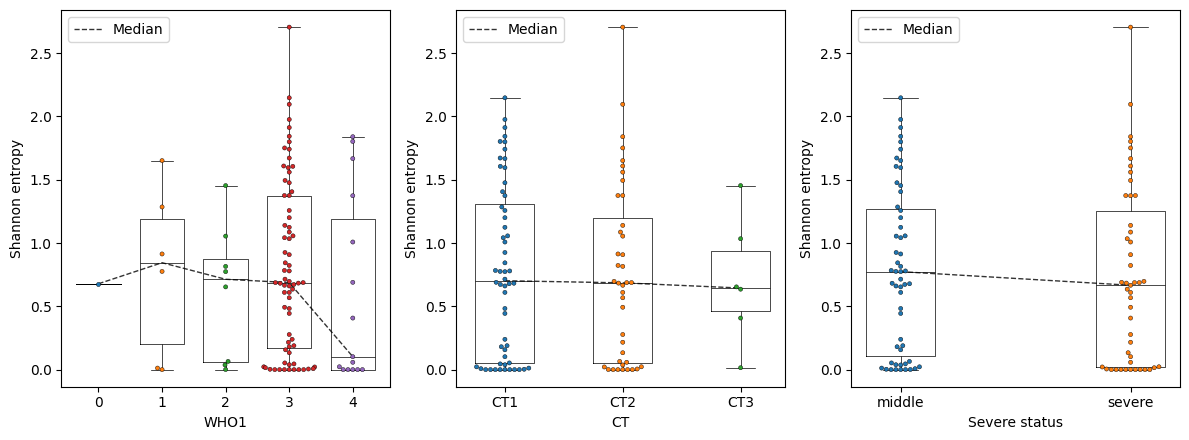

In [1982]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4.5))

#ax11 = plt.subplot(221)
#ax12 = plt.subplot(222)
#ax13 = plt.subplot(212)
#axs = [ax11, ax12, ax13]
sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 4]], axis=1),], fill=False, width=0.7, color='black', linewidth=.5, ax=axs[0])

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 4]], axis=1),], s=3, edgecolor='black', linewidth=.3, ax=axs[0])


axs[0].plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
            entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 4]], axis=1),]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')
axs[0].set_ylabel('Shannon entropy')
axs[0].set_xlabel('WHO1')
axs[0].legend()
sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], fill=False, width=0.5, color='black', linewidth=.5, ax=axs[1])

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], s=3, edgecolor='black', linewidth=.3, ax=axs[1])
axs[1].plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')

axs[1].set_xticks(ticks=[0, 1, 2], labels=['CT1', 'CT2', 'CT3'])
data = [entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)]
#geom_signif(data, max=2.5, ax=axs[1])
axs[1].set_ylabel('Shannon entropy')
axs[1].set_xlabel('CT')
axs[1].legend(loc=2)

sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)], fill=False, width=0.3, color='black', linewidth=.5, ax=axs[2])

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)], s=3, edgecolor='black', linewidth=.3, ax=axs[2])
axs[2].plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')

axs[2].set_xticks(ticks=[0, 1], labels=['middle', 'severe'])
axs[2].set_ylabel('Shannon entropy')
axs[2].set_xlabel('Severe status')
#axs[2].set_title('C', fontsize=25, loc='left')

data = [entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1)]
#geom_signif(data, max=2.5, ax=axs[2])


#plt.grid(alpha=0.5)
axs[2].legend()
plt.savefig('VIZ_NEW/Shannon_severity.png', dpi=800)
plt.savefig('VIZ_NEW/Shannon_severity.pdf')
plt.tight_layout()
plt.show()

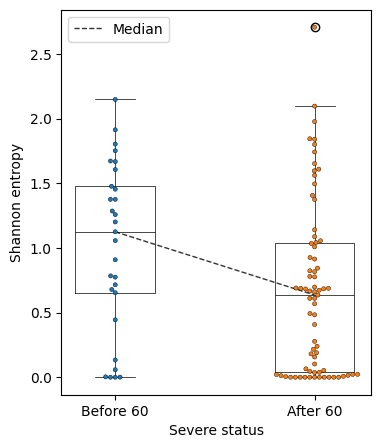

In [2390]:
plt.figure(figsize=(4, 5))
sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'noold']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'old']], axis=1)], fill=False, width=0.4, color='black', linewidth=.5)

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'noold']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'old']], axis=1)], s=3, edgecolor='black', linewidth=.3)
plt.plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'noold']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'old']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')
plt.xticks([0, 1], ['Before 60', 'After 60'])
plt.ylabel('Shannon entropy')
plt.xlabel('Severe status')
plt.legend()
plt.savefig('VIZ_NEW/Shannon_age.png', dpi=800, bbox_inches='tight')
plt.savefig('VIZ_NEW/Shannon_age.pdf', bbox_inches='tight')
plt.show()


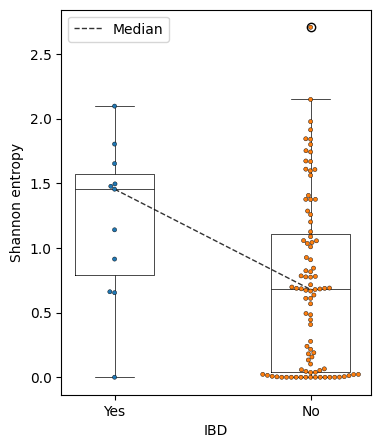

In [2389]:
plt.figure(figsize=(4, 5))
sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'no']], axis=1)], fill=False, width=0.4, color='black', linewidth=.5)

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'no']], axis=1)], s=3, edgecolor='black', linewidth=.3)
plt.plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'no']], axis=1)]], color='black', alpha=.8, linewidth=1, linestyle='dashed', label='Median')
plt.xticks([0, 1], ['Yes', 'No'])
plt.ylabel('Shannon entropy')
plt.xlabel('IBD')
plt.legend()
plt.savefig('VIZ_NEW/Shannon_IBD.png', dpi=800, bbox_inches='tight')
plt.savefig('VIZ_NEW/Shannon_IBD.pdf', bbox_inches='tight')
plt.show()


In [2387]:
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Inflammatory.diseases.of.the.bowel'] == 'no']], axis=1))

MannwhitneyuResult(statistic=704.0, pvalue=0.028358425291612074)

In [2361]:
def get_prevalence(functional_subset):
    
    prevalence_data = {}
    
    for function in functional_subset.index:
        
        prevalence = len(functional_subset.loc[function][functional_subset.loc[function] != 0])/len(functional_subset.columns)
        prevalence_data[function] = {'Prevalence': prevalence}
    
    return DataFrame(prevalence_data).T

In [2471]:
a = opn_nocontam.loc[opn_nocontam.index[opn_nocontam.index.str.contains('MCOV')!=1]]
opn_nocontam.loc[opn_nocontam.index[opn_nocontam[a[a.columns[a.sum(axis=0) != 0]].columns].sum(axis=1) != 0]][a.columns[a.sum(axis=0) != 0]]


,ASV82,ASV13,ASV220,ASV302
167,455,0,80,11
199,0,111,0,0
MCOV-357-F2,0,9676,0,0
MCOV-367-F2,0,9,0,0
MCOV-822-F2,0,18188,0,0
MCOV-974-F2,0,3529,0,0


In [2380]:
prev_info = get_prevalence(nocontam_otu_table_spec_level[2:].T)
prev_info = prev_info.sort_values('Prevalence')[::-1]
for i in prev_info.index:
    
    print(tax_table['Species'][i], prev_info['Prevalence'][i])



s__Candida_albicans 0.7745098039215687
s__Candida_parapsilosis 0.4019607843137255
s__Geotrichum_silvicola 0.37254901960784315
s__Engyodontium_album 0.2549019607843137
s__Cladosporium_herbarum 0.22549019607843138
s__Penicillium_roqueforti 0.1568627450980392
s__Ascochyta_medicaginicola_var._macrospora 0.14705882352941177
s__Clavispora_fructus 0.09803921568627451
s__Aspergillus_ruber 0.08823529411764706
s__Clavispora_lusitaniae 0.0784313725490196
s__Debaryomyces_prosopidis 0.0784313725490196
s__Apiotrichum_gracile 0.058823529411764705
s__Alternaria_alstroemeriae 0.058823529411764705
s__Kazachstania_aerobia 0.058823529411764705
s__Alternaria_japonica 0.049019607843137254
s__Malassezia_sp 0.049019607843137254
s__Aspergillus_flavus 0.0392156862745098
s__Hymenoscyphus_pusillus 0.0392156862745098
s__Apiotrichum_domesticum 0.0392156862745098
s__Cutaneotrichosporon_moniliiforme 0.0392156862745098
s__Pichia_membranifaciens 0.029411764705882353
s__Mucor_ctenidius 0.029411764705882353
s__Tausonia_p

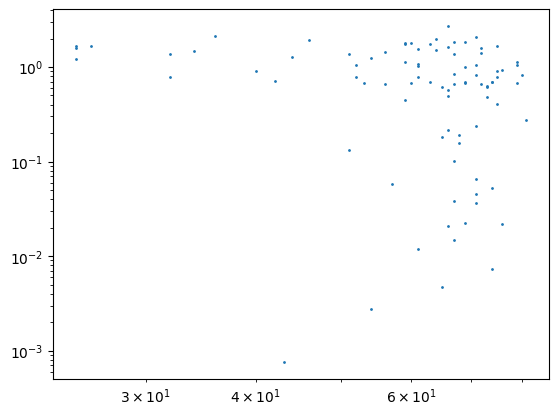

In [2357]:
plt.scatter(new_meta.age.values, entropy(opn_nocontam.loc[new_meta.age.index], axis=1), s=1)
plt.yscale('log')
plt.xscale('log')

In [2349]:
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'noold']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.age_group == 'old']], axis=1))

MannwhitneyuResult(statistic=1385.0, pvalue=0.015482199528516236)

In [2180]:
PERMANOVA = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/mapping_aproach/PERMANOVA.tsv', sep='\t')
PERMANOVA = PERMANOVA.loc[PERMANOVA.sort_values('R2').index][::-1]
PERMANOVA = PERMANOVA['R2'].to_dict()
PERMANOVA.pop('Total')
#PERMANOVA.pop('Residual')


1.0

In [2181]:
R2_val = {}

for param in PERMANOVA.keys():
    #print(param)
    R2_val[param] = {'R2' : PERMANOVA[param]}
R2_val = DataFrame(R2_val).T
#R2_val = R2_val.sort_values('R2')[::-1]
R2_val = R2_val*100
R2_val = R2_val.rename(index={'who1' : 'WHO1', 
'severe_status' : 'Severe status',
'Inflammatory.diseases.of.the.bowel' : 'Inflammatory bowel disease (IBD)',
'Arterial.hypertension' : 'Arterial hypertension',
'time_point' : 'Time point',
'antibiotics' : 'Antibiotic therapy',
'antibiotics.before.hospitalization' : 'Antibiotics before hospitalization',
'Current.smoking' : 'Smoking',
'sex' : 'Sex',
'age_group' : 'Age group(after 60 and before 60)',
'Coronary.heart.disease' : 'Coronary heart disease (CHD)',
'Taking.glucocorticoids.biological.therapy' : 'Glucocorticoids therapy',
'Proton_pump_inhibitors' : 'Proton pump inhibitors',
'Residual' : 'Other'})

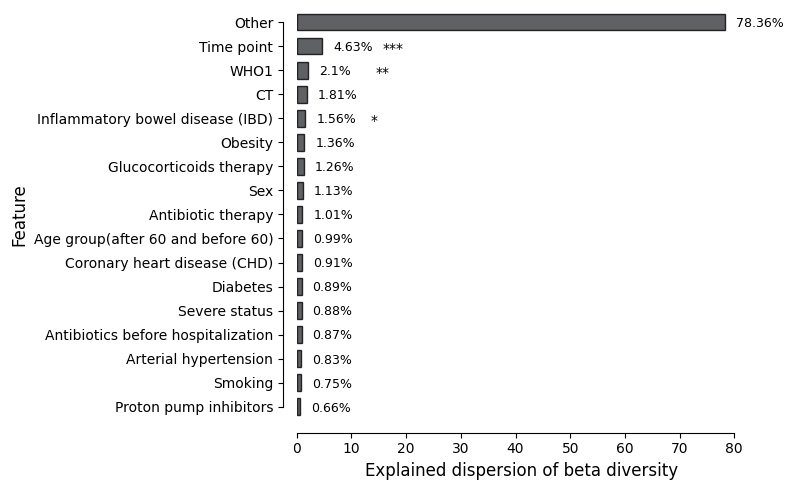

In [2182]:
plt.figure(figsize=(8, 5))
sns.barplot(R2_val, x="R2", 
            y=R2_val.index, 
            width=0.7, 
            edgecolor='black',
            color='#373A40',
            alpha=.8
         )


y_pos = len(R2_val)-.8

for feature in R2_val.index[::-1]:
    
    plt.text(R2_val.R2[feature]+2, y_pos, f'{np.round(R2_val.R2[feature], 2)}%', fontsize=9)
    y_pos -= 1

plt.text(7.6+8, 1.3, '***')
plt.text(6.4+8, 2.3, '**')
#plt.text(5.6+8, 3.3, '*')
plt.text(5.5+8, 4.3, '*')
#plt.text(5+8, 5.3, '*')
#plt.text(4.5+8, 6.3, '*')

sns.despine(offset=10, trim=True)

plt.ylabel('Feature', fontsize=12)
plt.xlabel('Explained dispersion of beta diversity', fontsize=12)
plt.tight_layout()
plt.savefig('VIZ_NEW//PERMANOVA_RES.png', dpi=800, bbox_inches='tight')
plt.savefig('VIZ_NEW/PERMANOVA_RES.pdf', bbox_inches='tight')
plt.show()

In [2189]:
new_meta.value_counts('Inflammatory.diseases.of.the.bowel')

Inflammatory.diseases.of.the.bowel
no     91
yes    11
Name: count, dtype: int64

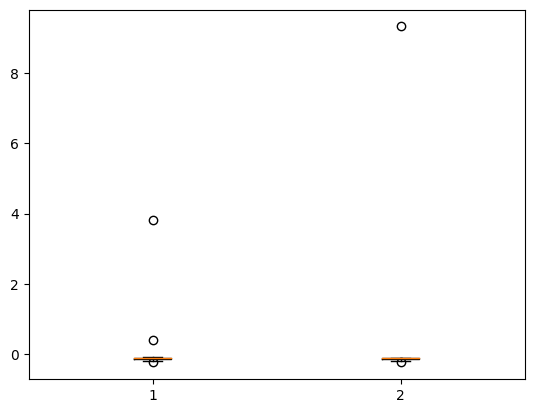

In [2332]:
nocontam_otu_table_spec_level = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')

from scipy.stats import zscore


infected_opn_nocontam = nocontam_otu_table_spec_level.loc[opn_nocontam.index.str.contains('MCOV')]
infected_opn_nocontam = (infected_opn_nocontam.T/infected_opn_nocontam.sum(axis=1)).T
infected_opn_nocontam = zscore(infected_opn_nocontam, axis=1)

F1 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F1')]
F2 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F2')]

for asv in ['ASV53']:
    
    plt.boxplot([F1[asv], F2[asv]])
    #plt.yscale('log')
    plt.show()

In [2423]:
nocontam_otu_table_spec_level = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')

from scipy.stats import zscore


infected_opn_nocontam = nocontam_otu_table_spec_level.loc[opn_nocontam.index.str.contains('MCOV')]
infected_opn_nocontam = (infected_opn_nocontam.T/infected_opn_nocontam.sum(axis=1)).T
infected_opn_nocontam = zscore(infected_opn_nocontam, axis=1)

F1 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F1')]
F2 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F2')]

pairs = {}

for i in infected_opn_nocontam.index:
    if 'F1' not in i: continue
    if i.split('-F1')[0]+'-F2' not in infected_opn_nocontam.index: continue

    pairs[i] = i.split('-F1')[0]+'-F2'

ASV8
ASV21


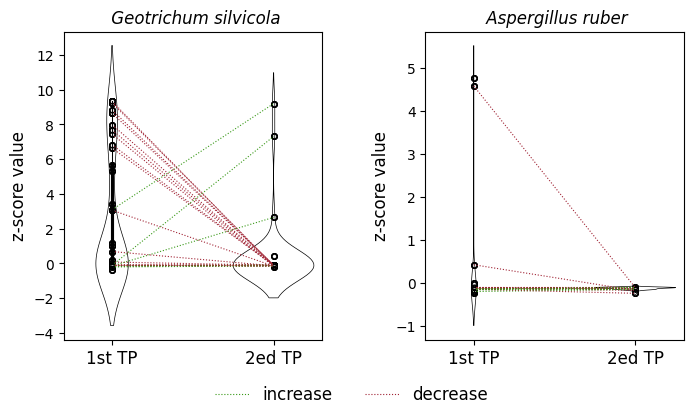

In [2323]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))


c = 0
low = 0
high = 0
for asv in ['ASV8', 'ASV21']:
    print(asv)
    for samp in pairs.keys():
        if F2[asv][pairs[samp]] > F1[asv][samp]:
            if test1 == False:
                axs[c].plot([F1[asv][samp], F2[asv][pairs[samp]]], c='#399918', linewidth=.8, linestyle='dotted', label='increase')
                test1 = True
                high += 1
            else:
                axs[c].plot([F1[asv][samp], F2[asv][pairs[samp]]], c='#399918', linewidth=.8, linestyle='dotted')
                
                high += 1
        else:
            if test2 == False:
                axs[c].plot([F1[asv][samp], F2[asv][pairs[samp]]], c='#A02334', linewidth=.8, linestyle='dotted', label='decrease')
                low += 1
                test2 = True
            else:
                
                axs[c].plot([F1[asv][samp], F2[asv][pairs[samp]]], c='#A02334', linewidth=.8, linestyle='dotted')
                low += 1
         #       print(F1[asv][samp], F2[asv][pairs[samp]])
        axs[c].scatter([0]*len(F1[asv]), [F1[asv]], color='white', edgecolor='black',s=12)
        axs[c].scatter([1]*len(F2[asv]), [F2[asv]], color='white',edgecolor='black', s=12)
  #  axs[c].boxplot([F1[asv], F2[asv]], positions=[0, 1])
        
        
    axs[c].set_ylabel('z-score value', fontsize=12)

    axs[c].set_xticks([0, 1], ['1st TP', '2ed TP'], fontsize=12)
    test1 = False
    test2 = False
    #sns.despine(offset=10, trim=True, ax=axs[c])
    sns.violinplot([F1[asv].values, F2[asv].values], fill=False, width=0.5, color='black', linewidth=.5, ax=axs[c])
    axs[c].set_xlim(-0.3, 1.3)
    axs[c].set_title(' '.join(tax_table['Species'][asv].split('_')[1:]), fontstyle='italic')
 #   sns.swarmplot([F1[asv][samp], F2[asv][pairs[samp]]], s=3, edgecolor='black', linewidth=.3, ax=axs[c])
    
    c += 1
plt.legend(ncols=2, bbox_to_anchor=(0.3, -0.1), fontsize=12, frameon=False)
#plt.tight_layout()

plt.subplots_adjust(wspace=.4)
plt.savefig('VIZ_NEW/Diff_pres_TPs.pdf', bbox_inches='tight')
plt.savefig('VIZ_NEW/Diff_pres_TPs.png', dpi=800, bbox_inches='tight')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4d2747f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4d273b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4d2747c40>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa4d273b940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4d273bbe0>,
 'means': []}

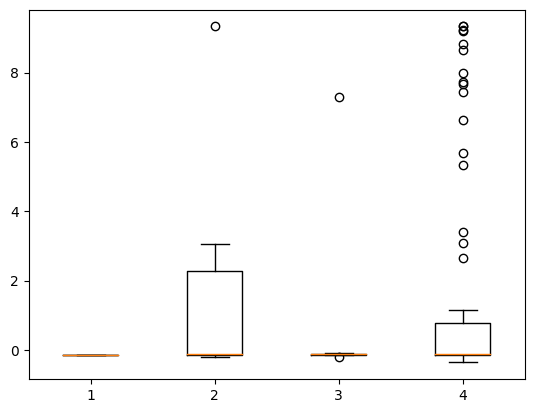

In [2426]:
nocontam_otu_table_spec_level_norm = infected_opn_nocontam#nocontam_otu_table_spec_level.T/ nocontam_otu_table_spec_level.sum(axis=1)
#nocontam_otu_table_spec_level_norm = nocontam_otu_table_spec_level_norm.T

plt.boxplot([nocontam_otu_table_spec_level_norm.loc[new_meta.index[new_meta.who1 == 0]]['ASV8'],
nocontam_otu_table_spec_level_norm.loc[new_meta.index[new_meta.who1 == 1]]['ASV8'],
nocontam_otu_table_spec_level_norm.loc[new_meta.index[new_meta.who1 == 2]]['ASV8'],
nocontam_otu_table_spec_level_norm.loc[new_meta.index[new_meta.who1 == 3]]['ASV8']])
#plt.yscale('log')

In [2331]:
9/93

0.0967741935483871

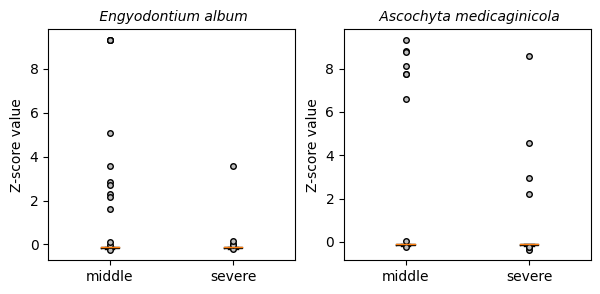

In [1975]:
nocontam_otu_table_spec_level = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')

from scipy.stats import zscore


infected_opn_nocontam = nocontam_otu_table_spec_level.loc[opn_nocontam.index.str.contains('MCOV')]
infected_opn_nocontam = (infected_opn_nocontam.T/infected_opn_nocontam.sum(axis=1)).T
infected_opn_nocontam = zscore(infected_opn_nocontam, axis=1)

F1 = infected_opn_nocontam.loc[new_meta['severe_status'][new_meta['severe_status'] == 'middle'].index]
F2 = infected_opn_nocontam.loc[new_meta['severe_status'][new_meta['severe_status'] == 'severe'].index]


fig, axs = plt.subplots(1, 2, figsize=(7, 3))
c = 0
flierprops = dict(markerfacecolor='0.75', markersize=4, linestyle='none')

for asv in ['ASV10', 'ASV4']:
    
    axs[c].boxplot([F1[asv], F2[asv]], flierprops=flierprops)
    #plt.yscale('log')
    axs[c].set_xticks([1, 2], ['middle', 'severe'])
    axs[c].set_ylabel('Z-score value')
    axs[c].set_title(' '.join(tax_table['Species'][asv].split('_')[1:4]), fontstyle='italic', fontsize=10)
    c += 1
plt.savefig('VIZ_NEW/Severe_status_info.png', dpi=800)
plt.savefig('VIZ_NEW/Severe_status_info.pdf')
plt.show()

In [1865]:
nocontam_otu_table_spec_level = read_csv('//mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/nocontam_otu_table_spec_level.tsv', sep='\t')
infected_opn_nocontam = nocontam_otu_table_spec_level.loc[opn_nocontam.index.str.contains('MCOV')]
infected_opn_nocontam = (infected_opn_nocontam.T/infected_opn_nocontam.sum(axis=1)).T
#infected_opn_nocontam = zscore(infected_opn_nocontam, axis=1)
F1 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F1')]
F2 = infected_opn_nocontam.loc[infected_opn_nocontam.index.str.contains('F2')]

print(len(F1['ASV4'][F1['ASV4']!= 0]))
print(len(F2['ASV4'][F2['ASV4']!= 0]))

8
7


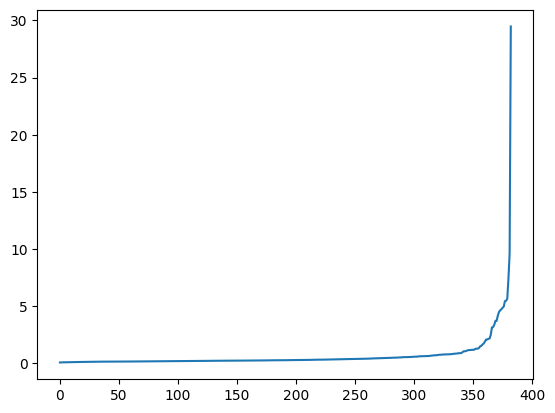

In [1785]:
opn_functional = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/FunFun_res/Results.tsv', sep='\t', index_col=0)
var_coef = opn_functional.std(axis=1) /opn_functional.median(axis=1)
var_coef = np.sort(var_coef)
plt.plot(var_coef)

In [2043]:
opn_functional_filt = opn_functional[opn_functional.sum(axis=1) > 0]

var_coef = opn_functional_filt.std(axis=1) /opn_functional_filt.mean(axis=1)
var_coef = var_coef.sort_values()
var_coef = var_coef.dropna()
var_coef = var_coef[var_coef!=np.inf]

In [2048]:
var_coef.sort_values()[(var_coef.sort_values()<2) & (var_coef.sort_values()> 1)]

Function
01052 Type I polyketide structures [PATH:ko01052]                               1.028443
04030 G protein-coupled receptors [BR:ko04030]                                  1.056587
01059 Biosynthesis of enediyne antibiotics [PATH:ko01059]                       1.062598
01053 Biosynthesis of siderophore group nonribosomal peptides [PATH:ko01053]    1.071553
01051 Biosynthesis of ansamycins [PATH:ko01051]                                 1.085757
00901 Indole alkaloid biosynthesis [PATH:ko00901]                               1.108780
00904 Diterpenoid biosynthesis [PATH:ko00904]                                   1.148241
04075 Plant hormone signal transduction [PATH:ko04075]                          1.171136
00998 Biosynthesis of various secondary metabolites - part 2 [PATH:ko00998]     1.219418
01054 Nonribosomal peptide structures [PATH:ko01054]                            1.221442
01057 Biosynthesis of type II polyketide products [PATH:ko01057]                1.239523
00404 Stauro

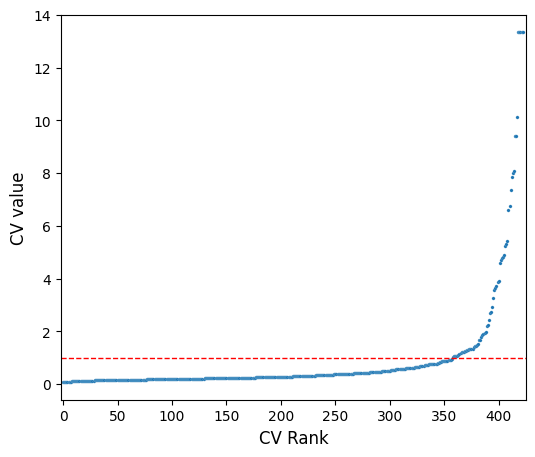

In [2045]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(6, 5))

plt.scatter(range(len(var_coef)), var_coef.values, s=6, edgecolor='white', linewidth=.1)

for x_coord, function in enumerate(var_coef.index):
    if var_coef[function] == np.nan:
        continue
    if var_coef[function] == np.inf:
        continue
    
    #plt.text(x_coord+2, var_coef[function], function, fontsize=2)
plt.plot([-2, len(var_coef)+2], [1, 1], color='red', linestyle='dashed', linewidth=1)
plt.xlim(-2, len(var_coef)+2)
#plt.grid()
plt.xlabel('CV Rank', fontsize=12)
plt.ylabel('CV value', fontsize=12)
#plt.savefig('VIZ/CV_plot.png', dpi=800)
#plt.savefig('VIZ/CV_plot.pdf')
plt.show()

In [2042]:
opn_functional.median(axis=1)

Function
01056 Biosynthesis of type II polyketide backbone [PATH:ko01056]    0.000000
00905 Brassinosteroid biosynthesis [PATH:ko00905]                   0.000000
03310 Nuclear receptors [BR:ko03310]                                0.000000
00943 Isoflavonoid biosynthesis [PATH:ko00943]                      0.000000
00512 Mucin type O-glycan biosynthesis [PATH:ko00512]               0.000000
                                                                      ...   
99980 Enzymes with EC numbers                                       0.018244
03009 Ribosome biogenesis [BR:ko03009]                              0.023575
02000 Transporters [BR:ko02000]                                     0.028977
03036 Chromosome and associated proteins [BR:ko03036]               0.034312
04131 Membrane trafficking [BR:ko04131]                             0.041154
Length: 430, dtype: float64

In [1789]:
def get_prevalence(functional_subset):
    
    prevalence_data = {}
    
    for function in functional_subset.index:
        
        prevalence = len(functional_subset.loc[function][functional_subset.loc[function] != 0])/len(functional_subset.columns)
        prevalence_data[function] = {'Prevalence': prevalence}
    
    return DataFrame(prevalence_data).T

In [1790]:
functional = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/MYCOBIOME/2024_10_08/FunFun_res/Results.tsv', sep='\t', index_col=0).T


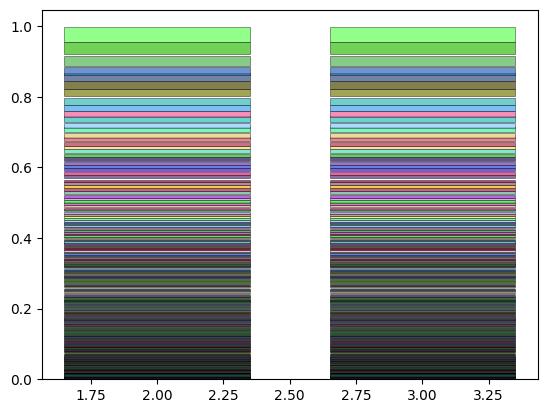

In [2007]:
bottom = 0
all_coords.append(sample_coord)

for otu in functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0).index:

    plt.bar(sample_coord, 
                  functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0)[otu], 
                  width, 
                  bottom=bottom,
                  edgecolor='black',
                  alpha=.7,
                  linewidth=0.4, 
                  color=Color_collection[otu])
    bottom += data_tax_df[sample][otu]


sample_coord += 1

bottom = 0
all_coords.append(sample_coord)

for otu in functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0).index:
    plt.bar(sample_coord, 
                  functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0)[otu], 
                  width, 
                  bottom=bottom,
                  edgecolor='black',
                  alpha=.7,
                  linewidth=0.4, 
                  color=Color_collection[otu])
    bottom += data_tax_df[sample][otu]


sample_coord += 1

In [2071]:
func_4_samp = {}

for samp in opn_nocontam[opn_nocontam.index.str.contains('MCOV')].index:
    
    func_4_samp[samp] = functional.loc[opn_nocontam.columns[opn_nocontam.loc[samp] != 0 ]].mean().to_dict()
func_4_samp = DataFrame(func_4_samp).T

In [2440]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection
from skbio.stats.composition import clr

pvals = []
lfc = []
functional_clr = func_4_samp
funct_F1 = functional_clr.loc[func_4_samp[func_4_samp.index.str.contains('F1')].index]
funct_F2 = functional_clr.loc[func_4_samp[func_4_samp.index.str.contains('F2')].index]

for samp in funct_F2.columns:

    pvals.append(mannwhitneyu(funct_F1[samp], funct_F2[samp])[1])
    lfc.append(np.log2(np.mean(funct_F1[samp])) - np.log2(np.mean(funct_F2[samp])))
    
paj = fdrcorrection(pvals)[1]

In [2441]:
fc = funct_F1.mean(axis=0) / funct_F2.mean(axis=0) 
fc[fc != 1]

01056 Biosynthesis of type II polyketide backbone [PATH:ko01056]         NaN
00905 Brassinosteroid biosynthesis [PATH:ko00905]                        NaN
03310 Nuclear receptors [BR:ko03310]                                     NaN
00943 Isoflavonoid biosynthesis [PATH:ko00943]                           NaN
00512 Mucin type O-glycan biosynthesis [PATH:ko00512]                    NaN
                                                                      ...   
99980 Enzymes with EC numbers                                       0.913163
03009 Ribosome biogenesis [BR:ko03009]                              1.023209
02000 Transporters [BR:ko02000]                                     1.033932
03036 Chromosome and associated proteins [BR:ko03036]               0.998559
04131 Membrane trafficking [BR:ko04131]                             1.017677
Length: 430, dtype: float64

In [2442]:
prev = get_prevalence(functional.T)

In [2443]:
data_info = DataFrame({ 
                       '-log10(p-value)' : -np.log10(paj),
                       'log2FoldChange' : lfc,
                       'Prevalence' : prev.loc[funct_F2.columns].Prevalence.values
                      }, index=funct_F2.columns)

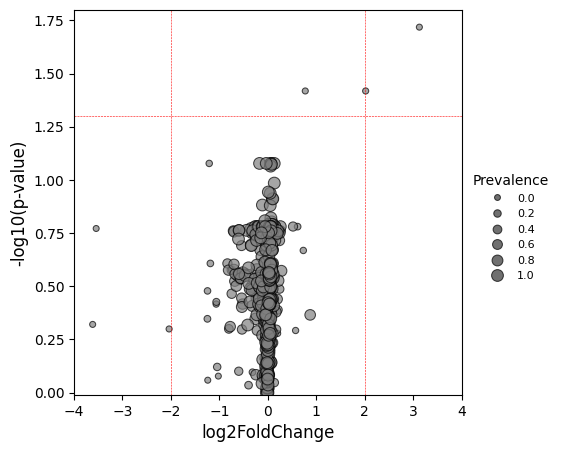

In [2444]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data_info, 
                x='log2FoldChange', 
                y='-log10(p-value)', 
           #     hue='Threshold', 
                size='Prevalence', 
            #    palette=['white', 'red'],
                edgecolor='black', 
                linewidth=.75, c='grey', alpha=.7
                )
plt.plot([-2, -2], [-0.01, 2], linewidth=0.4, color='red', linestyle='dashed')
plt.plot([2, 2], [-0.01, 2], linewidth=.4, color='red', linestyle='dashed')
plt.plot([-4, 4], [-np.log10(0.05), -np.log10(0.05)], linewidth=.4, color='red', linestyle='dashed')

plt.legend(bbox_to_anchor=(1.25, 0.6),frameon=False, fontsize=8, title_fontsize=10, title='Prevalence')
plt.xlim(-4, 4)
plt.ylim(-0.01, 1.8)
plt.ylabel('-log10(p-value)', fontsize=12)
plt.xlabel('log2FoldChange', fontsize=12)
#plt.savefig('VIZ/FunFun_voolcano.pdf', bbox_inches='tight')
#plt.savefig('VIZ/FunFun_voolcano.png', dpi=800, bbox_inches='tight')
plt.show()

In [2084]:
data_info[data_info['-log10(p-value)']> -np.log10(0.05)]

,-log10(p-value),log2FoldChange,Prevalence
00571 Lipoarabinomannan (LAM) biosynthesis [PATH:ko00571],1.718062,3.129572,0.016854
00542 O-Antigen repeat unit biosynthesis [PATH:ko00542],1.418031,0.774112,0.022472
02060 Phosphotransferase system (PTS) [PATH:ko02060],1.418031,2.020576,0.028090


In [2099]:
var_coef.loc[data_info[data_info.Prevalence > 0.5].index].sort_values()[var_coef.loc[data_info[data_info.Prevalence > 0.5].index].sort_values() > 1]
#var_coef#[-30:]

01052 Type I polyketide structures [PATH:ko01052]                               1.028443
04030 G protein-coupled receptors [BR:ko04030]                                  1.056587
01059 Biosynthesis of enediyne antibiotics [PATH:ko01059]                       1.062598
01053 Biosynthesis of siderophore group nonribosomal peptides [PATH:ko01053]    1.071553
01051 Biosynthesis of ansamycins [PATH:ko01051]                                 1.085757
00901 Indole alkaloid biosynthesis [PATH:ko00901]                               1.108780
00904 Diterpenoid biosynthesis [PATH:ko00904]                                   1.148241
04075 Plant hormone signal transduction [PATH:ko04075]                          1.171136
00998 Biosynthesis of various secondary metabolites - part 2 [PATH:ko00998]     1.219418
01054 Nonribosomal peptide structures [PATH:ko01054]                            1.221442
01057 Biosynthesis of type II polyketide products [PATH:ko01057]                1.239523
00404 Staurosporine b

In [2070]:
func_4_samp

,01056 Biosynthesis of type II polyketide backbone [PATH:ko01056],00905 Brassinosteroid biosynthesis [PATH:ko00905],03310 Nuclear receptors [BR:ko03310],00943 Isoflavonoid biosynthesis [PATH:ko00943],00512 Mucin type O-glycan biosynthesis [PATH:ko00512],04052 Cytokines and growth factors [BR:ko04052],04514 Cell adhesion molecules [PATH:ko04514],04610 Complement and coagulation cascades [PATH:ko04610],00331 Clavulanic acid biosynthesis [PATH:ko00331],04672 Intestinal immune network for IgA production [PATH:ko04672],...,01002 Peptidases and inhibitors [BR:ko01002],03400 DNA repair and recombination proteins [BR:ko03400],03029 Mitochondrial biogenesis [BR:ko03029],03019 Messenger RNA biogenesis [BR:ko03019],04147 Exosome [BR:ko04147],99980 Enzymes with EC numbers,03009 Ribosome biogenesis [BR:ko03009],02000 Transporters [BR:ko02000],03036 Chromosome and associated proteins [BR:ko03036],04131 Membrane trafficking [BR:ko04131]
MCOV-1-F1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014715,0.017491,0.022520,0.021643,0.021927,0.017017,0.024691,0.032041,0.034252,0.043570
MCOV-1-F2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015738,0.018562,0.020414,0.019532,0.020754,0.024479,0.023112,0.031217,0.033255,0.041486
MCOV-10-F1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014691,0.017346,0.022039,0.021723,0.022152,0.016769,0.024465,0.031434,0.034197,0.043449
MCOV-102-F2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015655,0.017812,0.023776,0.021276,0.021398,0.017520,0.025658,0.037967,0.033860,0.043234
MCOV-104-F1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015765,0.017779,0.021896,0.020916,0.022102,0.019402,0.024435,0.031003,0.034380,0.042544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCOV-978-F2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015056,0.018340,0.021347,0.020181,0.021169,0.021739,0.023705,0.035644,0.033559,0.041953
MCOV-98-F1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014556,0.017297,0.021865,0.021768,0.022208,0.016680,0.024287,0.031188,0.034217,0.043553
MCOV-98-F2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017707,0.018973,0.020513,0.020102,0.021452,0.020077,0.023482,0.031605,0.034605,0.042204
MCOV-990-F1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014830,0.017908,0.022631,0.021589,0.022308,0.018057,0.024962,0.030271,0.035219,0.042229


In [2000]:
functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0)

Function
01056 Biosynthesis of type II polyketide backbone [PATH:ko01056]    0.000000
00905 Brassinosteroid biosynthesis [PATH:ko00905]                   0.000000
03310 Nuclear receptors [BR:ko03310]                                0.000000
00943 Isoflavonoid biosynthesis [PATH:ko00943]                      0.000000
00512 Mucin type O-glycan biosynthesis [PATH:ko00512]               0.000000
                                                                      ...   
99980 Enzymes with EC numbers                                       0.022767
03009 Ribosome biogenesis [BR:ko03009]                              0.023052
02000 Transporters [BR:ko02000]                                     0.027450
03036 Chromosome and associated proteins [BR:ko03036]               0.034350
04131 Membrane trafficking [BR:ko04131]                             0.040806
Length: 430, dtype: float64

In [ ]:
functional.loc[(opn_nocontam[opn_nocontam.index.str.contains('F1')].sum(axis=0) != 0).index].mean(axis=0)

In [1596]:
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1))

MannwhitneyuResult(statistic=1566.0, pvalue=0.0663149873217428)

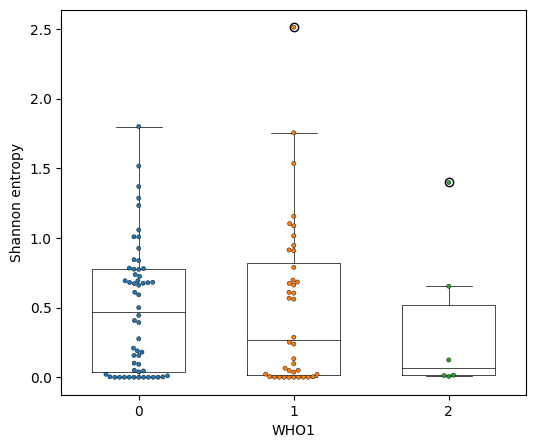

In [1545]:
plt.figure(figsize=(6, 5))
sns.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], fill=False, width=0.6, color='black', linewidth=.5)

sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1)], s=3, edgecolor='black', linewidth=.3)


#plt.plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 0]], axis=1),
#             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 1]], axis=1),
#             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 2]], axis=1),
#             entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 3]], axis=1),
#            entropy(opn_nocontam.loc[new_meta.index[new_meta.who1 == 4]], axis=1),]], color='black', alpha=.8)
plt.ylabel('Shannon entropy')
plt.xlabel('WHO1')
#plt.grid(alpha=0.5)
plt.savefig('VIZ_NEW/Shannon_CT.png', dpi=800)
plt.savefig('VIZ_NEW/Shannon_CT.pdf')
plt.show()

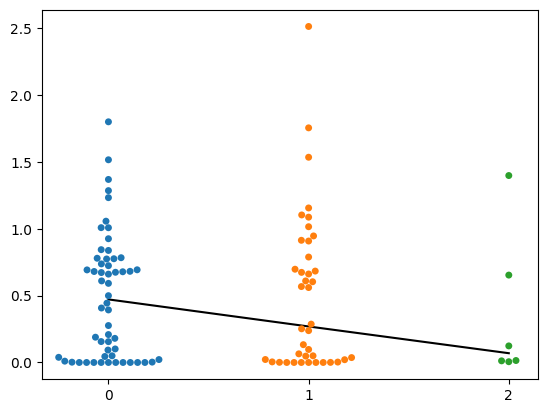

In [1543]:
sns.swarmplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ])
plt.plot([np.median(i) for i in [entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ]], color='black')

#plt.yscale('log')
plt.show()

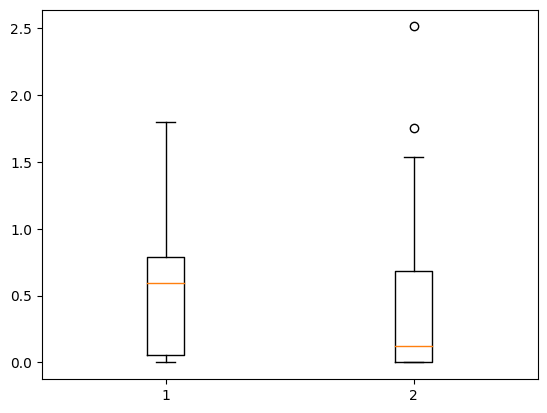

In [1552]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'middle']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.severe_status == 'severe']], axis=1),
           #  entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ])
#plt.yscale('log')
plt.show()

In [ ]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT1']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT2']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ])
plt.yscale('log')
plt.show()

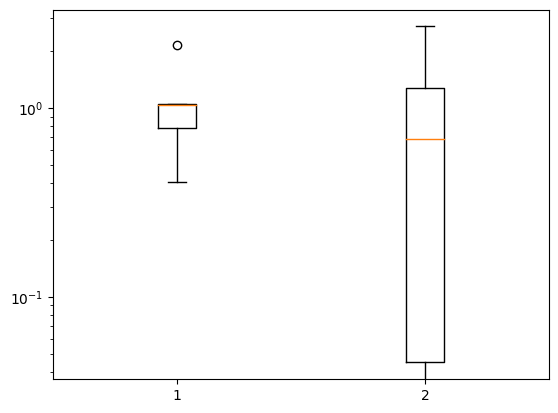

In [1386]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta['Current.smoking'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Current.smoking'] == 'no']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ])
plt.yscale('log')
plt.show()


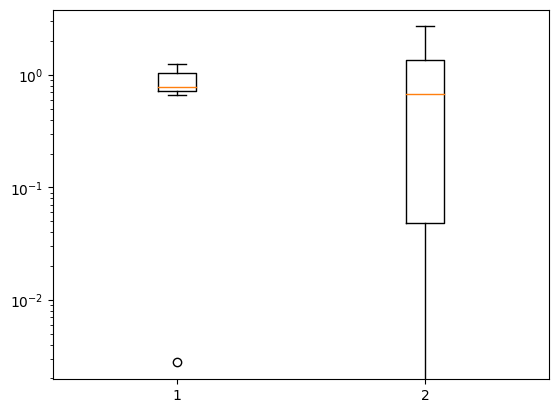

In [1387]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta['Past.smoking'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['Past.smoking'] == 'no']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT3']], axis=1),
             #entropy(opn_nocontam.loc[new_meta.index[new_meta.CT == 'CT4']], axis=1),
            ])
plt.yscale('log')
plt.show()


In [1637]:
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta['age_group'] == 'old']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['age_group'] == 'noold']], axis=1))

MannwhitneyuResult(statistic=732.0, pvalue=0.015482199528516236)

In [2482]:
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta['antibiotics'] == 'yes']], axis=1),
             entropy(opn_nocontam.loc[new_meta.index[new_meta['antibiotics'] == 'no']], axis=1))

MannwhitneyuResult(statistic=1052.0, pvalue=0.48824864932786116)

In [2485]:
new_meta

,sex,age,antibiotics.before.hospitalization,Coronary.heart.disease,Chronic.obstructive.pulmonary.disease,who1,who2,Obesity,Arterial hypertension,Chronic.heart.failure,...,Taking.glucocorticoids.biological.therapy,CT,antibiotics,Proton_pump_inhibitors,antimycotics,yeasts,Time_point,severe_status,time_point,age_group
MCOV-1-F1,female,54,yes,no,no,3.0,1.0,yes,no,no,...,no,CT1,no,no,no,no,F2,middle,F1,noold
MCOV-1-F2,female,54,yes,no,no,3.0,1.0,yes,no,no,...,no,CT1,no,no,no,no,F2,middle,F2,noold
MCOV-10-F1,male,61,yes,no,yes,3.0,1.0,yes,yes,no,...,no,CT3,yes,no,no,no,F2,severe,F1,old
MCOV-102-F2,female,68,no,no,no,3.0,1.0,no,no,no,...,no,CT1,yes,yes,no,no,F2,middle,F2,old
MCOV-104-F1,male,59,yes,no,no,4.0,1.0,no,no,no,...,no,CT1,yes,yes,no,no,F2,severe,F1,noold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCOV-978-F2,male,71,no,yes,no,3.0,1.0,no,yes,no,...,no,CT1,no,yes,no,no,F2,middle,F2,old
MCOV-98-F1,male,51,no,no,no,3.0,1.0,no,no,no,...,no,CT2,no,no,no,no,F2,severe,F1,noold
MCOV-98-F2,male,51,no,no,no,3.0,1.0,no,no,no,...,no,CT2,no,no,no,no,F2,severe,F2,noold
MCOV-990-F1,female,75,yes,no,no,1.0,0.0,no,no,no,...,no,CT2,no,yes,no,no,F2,middle,F1,old


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4cbea5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4c1d56fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4c7145df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa4d5a08940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4d5a08d90>,
 'means': []}

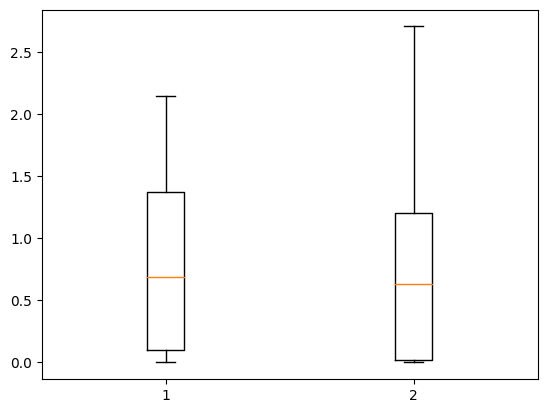

In [2487]:
plt.boxplot([entropy(opn_nocontam.loc[new_meta.index[new_meta['antibiotics.before.hospitalization'] == 'yes']], axis=1), 
entropy(opn_nocontam.loc[new_meta.index[new_meta['antibiotics.before.hospitalization'] == 'no']], axis=1)])

In [1377]:
from scipy.stats import mannwhitneyu 
mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'female']], axis=1), entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'male']], axis=1))


#mannwhitneyu(entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'female']], axis=1), entropy(opn_nocontam.loc[new_meta.index[new_meta.sex == 'male'])

MannwhitneyuResult(statistic=1074.0, pvalue=0.25616103238622967)